In [96]:
import anndata
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt

In [129]:
adata = anndata.read_h5ad('../RNA-seq_Hemming2020/Data/Unprocessed_Hemming2020_Data.h5ad')

In [130]:
adata

AnnData object with n_obs × n_vars = 85418 × 33538
    obs: 'Patient', 'Cluster', 'Diagnosis', 'TCellCluster'
    var: 'GeneSymbol'

In [131]:
# Some filtering
sc.pp.filter_cells(adata, min_genes=200) #get rid of cells with fewer than 200
sc.pp.filter_genes(adata, min_cells=3) #get rid of genes that are found in fewer than 3 cells

In [132]:
# Identifying mitochondrial genes; 13 of them
adata.var['mt'] = adata.var['GeneSymbol'].str.startswith('MT-')


In [133]:
# Calculating quality control metrics of mitochondrial DNA and adding it to the adata
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

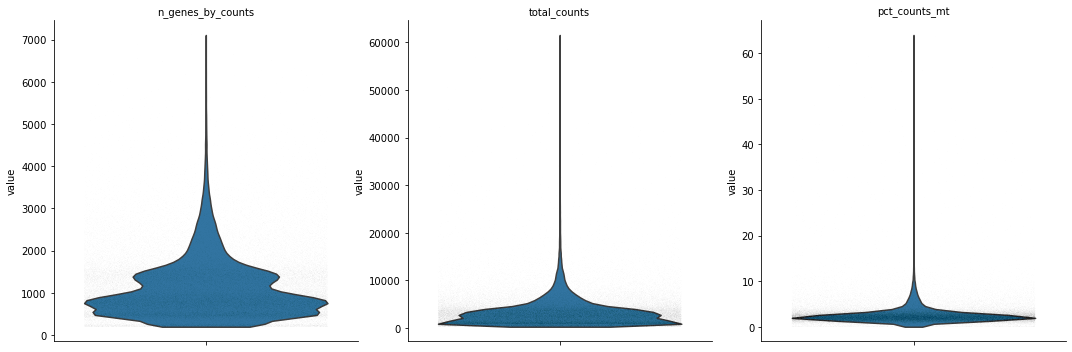

In [134]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, size = 0.1,  multi_panel=True)

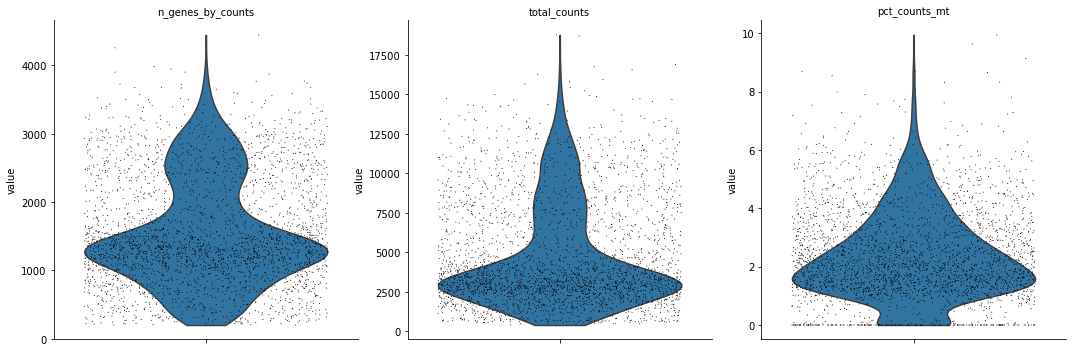

In [135]:
# COVID - Neural Covid - QC

adata_COVID = adata[adata.obs['Diagnosis'] == "COVID", :]
sc.pl.violin(adata_COVID, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, dotsize = 0.00001,  multi_panel=True)
# print(f'Cell counts: {adata_COVID.n_obs}') - 3013 cells


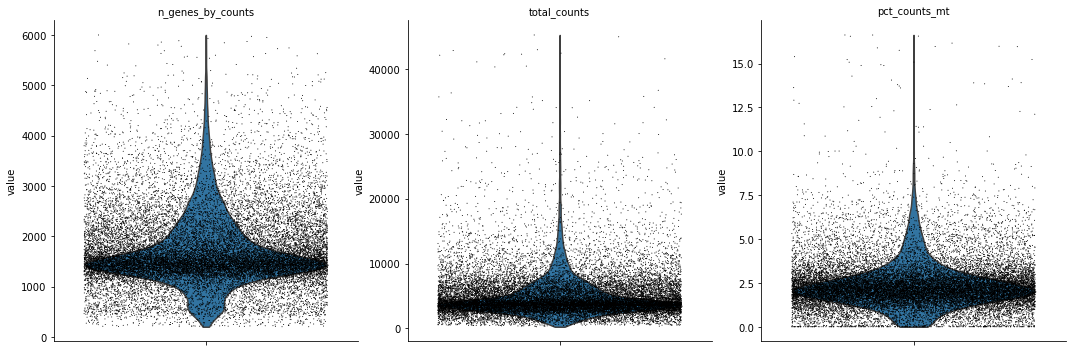

In [137]:
# VE - Viral Encephalitis -  QC

adata_VE = adata[adata.obs['Diagnosis'] == "VE", :]
sc.pl.violin(adata_VE, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, dotsize = 0.00001,  multi_panel=True)
# print(f'Cell counts: {adata_VE.n_obs}')# - 22706 cells


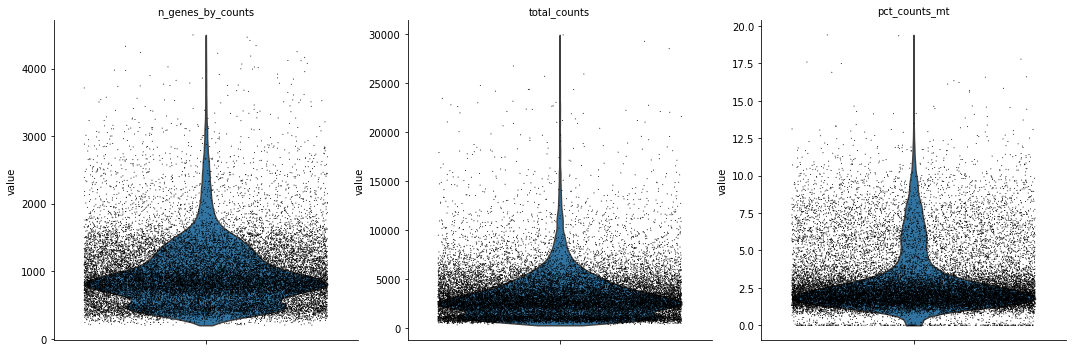

In [138]:
#  IIH - idiopathic intracranial hypertension - QC

adata_IIH = adata[adata.obs['Diagnosis'] == "IIH", :]
sc.pl.violin(adata_IIH, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, dotsize = 0.00001,  multi_panel=True)

# print(f'Cell counts: {adata_IIH.n_obs}')# - 23464 cells


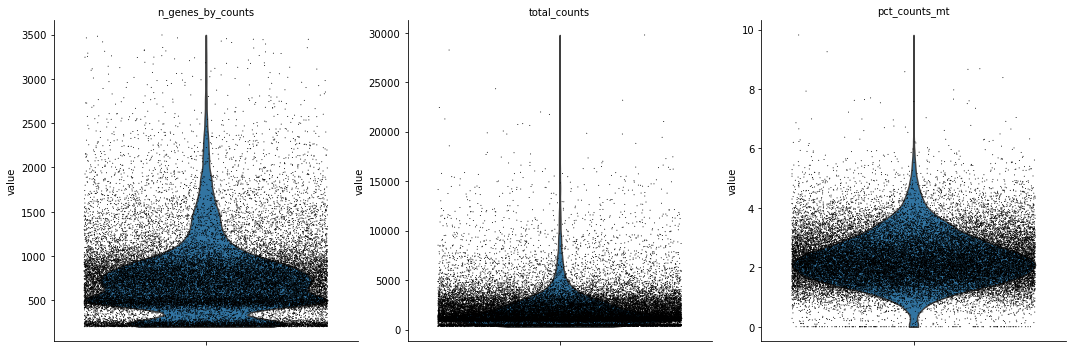

In [139]:
# MS-  relapsing-remitting multiple sclerosis - QC

adata_MS = adata[adata.obs['Diagnosis'] == "MS", :]
sc.pl.violin(adata_MS, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], 
             jitter=0.4, dotsize = 0.00001,  multi_panel=True,
            ylim=[(0, 2500), (0, 10000), (0, 8)])

# print(f'Cell counts: {adata_MS.n_obs}')# - 31736 cells

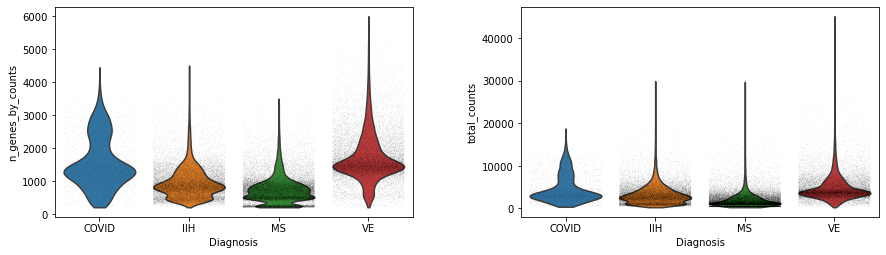

In [140]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'], 
             groupby='Diagnosis', jitter = 0.4, size=0.2, multi_panel=True)


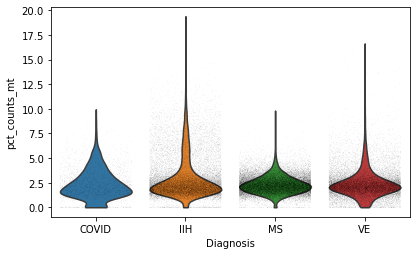

In [141]:
sc.pl.violin(adata, ['pct_counts_mt'], 
             groupby='Diagnosis', jitter = 0.4, size=0.2)

(0.0, 5000.0)

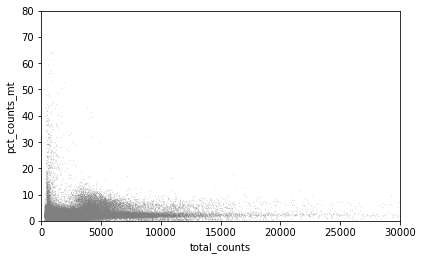

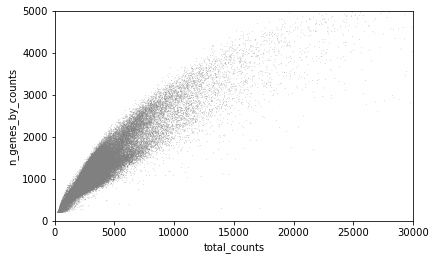

In [142]:
ax = sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt', show = False)
ax.set_xlim(0,30000)
ax.set_ylim(0,80)
ax1 = sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts', show = False)
ax1.set_xlim(0,30000)
ax1.set_ylim(0,5000)

In [144]:
# removing outliers based on quantile 

# Selecting quantile limits
upper_lim = np.quantile(adata.obs.n_genes_by_counts.values, 0.98)
lower_lim = np.quantile(adata.obs.n_genes_by_counts.values, 0.02)
# print(f'{lower_lim} to {upper_lim}') #188.0 to 3116.66

# Can remove outliers based on values selected visually from the plots above
adata = adata[(adata.obs.n_genes_by_counts < upper_lim) & (adata.obs.n_genes_by_counts > lower_lim)]

# There seems to be some mitochondrial outliers that are greater than 40%
adata = adata[adata.obs.pct_counts_mt < 40]


In [145]:
adata

View of AnnData object with n_obs × n_vars = 79570 × 22807
    obs: 'Patient', 'Cluster', 'Diagnosis', 'TCellCluster', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'GeneSymbol', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'Diagnosis_colors'

In [149]:
adata.X[1,:].sum()

2019.0

In [150]:
sc.pp.normalize_total(adata, target_sum=1e4)

C:\ProgramData\Anaconda3\lib\site-packages\scanpy\preprocessing\_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [159]:
adata.write_h5ad(filename='../RNA-seq_Hemming2020/Data/Processed_Hemming2020_Data.h5ad')